# PRE-LAB 3: RECAP + Making your own functions

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University) 

--------------------------------------------------

This PRE-LAB has no grade associated it (i.e. freebie). However, it is highly advised to do it, so that you better understand LAB3

--------------------------------------------------

## RECAP from LAB1 (variables, functions / methods, modules)

### Variable

A **Variable** is a user-defined label that can be used to name anything. For example, `a = 2` or `my_var = 3`


### Functions (built-in and from imported Modules)
**Functions** are one of the ways to "do stuff" in Python (the other way is with and **methods**, see below). There are two types of functions:
* **Built-in functions** follow the nomenclature below: <br>
<span class="nomenclature">output = FunctionName(input)</span><br>
For example, `print('hello world!')`<br><br>
* **Functions** from an imported **Module** follow the nomenclature below: <br>
    <span class="nomenclature">output = ModuleName.FunctionName(input)</span><br>
    For example:

In [6]:
import math

a = math.sin(100)

print(a)

-0.5063656411097588


### Methods

**Methods** are the other way to "do stuff" in Python. **Methods** follow the nomenclature below: <br>
<span class="nomenclature">output = input.MethodName(arguments)</span><br>

Note that you first have to create a **variable**. Then you can apply the **method** to the created variable. Example:

In [7]:
mylist = [4,7,2,9,6,3,3,8,5,10]

# Then, this appends the number "2" to the end of mylist
mylist.append(2)

print(mylist)

[4, 7, 2, 9, 6, 3, 3, 8, 5, 10, 2]


## Model from last week's LAB

The code below is one of the NPZ models we did in LAB 2 (i.e. Checkpoint 5). Lets take one more look at it...

<div class="c2c"></div>

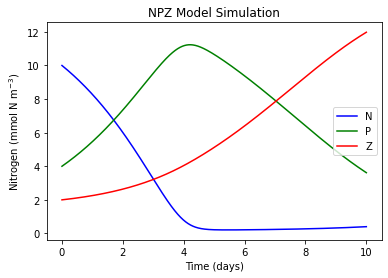

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Framework
days = 10
dt   = 0.01 # units: days

# Parameters
mu     = 0.5  # growth rate of pythoplankton (units: d^-1)
K      = 1    # half-saturation for nutrient absoption by pythoplankton (units: mmolN m^-3)
gamma  = 0.4  # growth rate of zooplankton (units: d^-1)
Lambda = 0.1  # initial slope of ingestion saturation of zooplankton (units: mmol N^-1 m^3)
mP     = 0.07 # mortality rate of pythoplankton (units: d^-1)
mZ     = 0.03 # mortality rate of zooplankton (units: d^-1)

# Initial conditions
Pinitial = 4  # initial pythoplankton concentration (units: mmolN m^-3)
Ninitial = 10 # initial nutrients concentration (units: mmolN m^-3)
Zinitial = 2  # initial zooplankton concentration (units: mmolN m^-3)

#%% Chores (calculate timestemps, create zero vectors, create time vector)
NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
N = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
P = np.zeros((NoSTEPS,),float) # same as above
Z = np.zeros((NoSTEPS,),float) # same as above

#%% Initializing with initial conditions
P[0] = Pinitial
N[0] = Ninitial
Z[0] = Zinitial

#%% *****************************************************************************
# MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N*P[t]) - (gamma*L_P*Z[t])- (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) - (mu*L_N*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P*Z[t]) - (mZ*Z[t])) * dt)
# end of main model LOOP*******************************************************
# *****************************************************************************
    
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,N,'b-')
ax.plot(time,P,'g-')
ax.plot(time,Z,'r-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZ Model Simulation')
plt.legend(['N','P','Z'])
plt.show()

<div class="Q"><br>

From the code above... in the line:
    
    days = 10
    
What is <b>days</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    mu     = 0.5  # growth rate of pythoplankton (units: d^-1)
    
What is <b>mu</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    Zinitial = 2  # initial zooplankton concentration (units: mmolN m^-3)
    
What is <b>Zinitial</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
    
What is <b>int</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
    
What is <b>np</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
    
What is <b>.linspace</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    N = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
    
What is <b>.zeros</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... in the line:
    
    P = np.zeros((NoSTEPS,),float) # same as above
    
What is <b>P</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... 
    
What <b>type</b> of variable is <b>P</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

From the code above... 
    
What is the <b>length</b> of <b>P</b>?

<br><br><div class="qhelp"></div></div>

-----------------

## Anatomy of a model

Take another look at the code above (another example would be the file you did in LAB2, <span class='file'>NPZmodel.py</span>)

As you can see there are "sections". Below is a diagram of an model example. In this case the model file is called <span class='file'>my_model.py</span>, and the different sections are color-coded. I'll explain each section below.

<img src="./media/Slide2.PNG" width="900px">

### Section: Define Parameters

Usually comments and module imports go at the top... but right after that, the first code of the model is where we create variables defining all the parameters that the model will use.

<img src="./media/Slide3.PNG" width="900px">

### Section: "Chores"

Here we do a bit of math to figure out how many time-steps do we need (i.e. compute NoSTEPS), and we use NoSTEPS to create a `time` array of the correct length and empty arrays for each state variable. We also initialize the first element of each state variable.

<img src="./media/Slide4.PNG" width="900px">

### Section: MAIN MODEL LOOP

Here we have a `FOR` loop where we estimate the future value of all state variables. This is the "meat" of the model... where all the magic happens. Note that all the sections above are there just to create and set up everything that the `MAIN MODEL LOOP` needs.

<img src="./media/Slide5.PNG" width="900px">

### Section: Print graphs

Here we use model output to create graphs.

<img src="./media/Slide6.PNG" width="900px">

### Back to the MAIN MODEL LOOP

Lets go back to the `MAIN MODEL LOOP`, which is where all the calculations are done (i.e. the "magic"). Note that in the first part we **estimate Limitations**.

<img src="./media/Slide8.PNG" width="900px">

For charity we can split the second section...

<img src="./media/Slide9.PNG" width="900px">

...into two sections (1) to estimate the "time rate of change" for all variables, and (2) to update and step all the variables (i.e. time-stepping)

<img src="./media/Slide10.PNG" width="900px">

Note that the section to "estimate the time-rate of change for all variables" can be further divided into 2 sections...

<img src="./media/Slide11.PNG" width="900px">

...these sections are (1) process estimation and (2) actual estimation of time-rate of change for all variables. This way you can easily see what part of the code estimates each biological process (e.g. `P_uptake_of_N`)

<img src="./media/Slide12.PNG" width="900px">

### (almost) final product

That is it! Below is the anatomy of a "generic" model. The next step is to divide the sections into functions. But before we do that, I have to go on a tangent to explain "user-made" functions.

<img src="./media/Slide13.PNG" width="900px">

## Tangent: User-made Functions and modules

So far we talked about: 

(1) built-in Python functions, e.g.

In [16]:
int(3.79086)

3

(2) Functions imported from a module

In [17]:
import math

math.sin(4)

-0.7568024953079282

However, you can make your own **functions!** Actually, you can make your own **module** with a bunch of included functions.

Lets try it!

In **Spyder**, make 2 new empty files and save them with the names <span class='file'>my_module.py</span> and <span class='file'>experiment_test.py</span>

<div class="important"></div> Make sure your "module" file and the "experiment" file are in THE SAME directory

Copy-paste the following in <span class='file'>my_module.py</span>, then save the file:

In [18]:
def my_function():

    print("This is just a test!")
    
    return

Then, copy-paste the following into <span class='file'>experiment_test.py</span> and click <span class='run'></span>

In [19]:
import my_module as mm

mm.my_function()

This is just a test!


As you can see, when you ran <span class='file'>experiment_test.py</span>, it loaded the `my_module` module (and nicknamed it `mm`), then it executed the function `my_function`... which in turn printed "This is just a test!" to the console's screen. Congratulations, you just wrote your first Python module!


Lets add another function. Copy-paste the following (overwriting its contents) to <span class='file'>my_module.py</span>... and click **Save**. Now we have 2 functions.

In [20]:
def my_function():

    print("This is just a test!")
    
    return


def my_name(name):

    print("My name is " + name)
    
    return

Copy-paste the following (overwriting its contents) to <span class='file'>experiment_test.py</span>, the click <span class='run'></span>

In [21]:
import my_module as mm

mm.my_function()

mm.my_name('John Smith')

This is just a test!
My name is John Smith


In addition to what you did before, you also called the function `mm.my_name` with the input `'John Smith'` and as a result you got the following output printed to the console: `My name is John Smith`

One more. Change the input name to `'Frida'` and click <span class='run'></span>

In [22]:
import my_module as mm

mm.my_function()

mm.my_name('Friday')

This is just a test!
My name is Friday


### Developing modules ( if __name__ == '__main__' )

When developing modules it is annoying to have write code in one file, and then have run a different file to run and test your module code. However, there is the `if __name__ == '__main__'` trick, which allows you to have some code that will only be executed if you **RUN** the "module" file, and it will **NOT** be executed if the module files is called (i.e. imported) by another file. 

Copy-paste the following (overwriting its contents) to <span class='file'>my_module.py</span>... and click Save.

In [13]:
def my_function():

    print("This is just a test!")
    
    return


def my_name(name):

    print("My name is " + name)
    
    return
    
if __name__ == "__main__":
    # Testing code
    # This will only be executed if you "RUN" this file 
    print('********************************')
    print('You are running my_module.py')
    print('-------------------------------')
    my_function()
    my_name('Batman')
    print('********************************')

********************************
You are running my_module.py
-------------------------------
This is just a test!
My name is Batman
********************************


<span class='important'></span> If you don't place your code inside the `if __name__ == "__main__":` statement, it will be executed when another file "imports" the `my_module` module. 

## END of TANGENT:  Back to "Anatomy of a model"

## How to pack out model code into functions

Now that you know how to make user-made functions and modules, we can explain the process of turning your <span class='file'>my_module.py</span> model file into a Python **module** with a bunch of functions.

<img src="./media/Slide14.PNG" width="900px">

### Why?

After you finish coding your model and you make sure it works, **you really want to leave it alone, and never touch that file again**. You don't want to change your <span class='file'>my_module.py</span> file every time you want to run a model experiment, because you risk breaking your model. You want to do have a separate file (e.g. <span class='file'>PLAYING_with_my_model.py</span> where you **import** your model as a module and then use it to run experiments. In this second example your <span class='file'>my_module.py</span> model file remains safe and untouched!

<img src="./media/Slide15.PNG" width="900px">

In LAB3 we will create a model file that follows the anatomy explained above.

### Please go to LAB3


# **This is the end of the DEMO**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [14]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()